## Observations and Insights 

In [17]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_df = pd.DataFrame(mouse_df)

In [2]:
# Checking the number of mice.
mouse_df.count()


Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [5]:
mouse_df.dtypes

Mouse ID               object
Drug Regimen           object
Sex                    object
Age_months              int64
Weight (g)              int64
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object

In [7]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_df.sort_values(by = ["Mouse ID", "Timepoint"], axis = 0, ascending=True, inplace=True)

last_mouse = ()
last_tp = 0
dup_mouse = []

for index, mouse in mouse_df.iterrows():
    if (mouse["Mouse ID"] == last_mouse) & (mouse["Timepoint"] == last_tp):
        dup_mouse.append(mouse[0])
    last_mouse = mouse["Mouse ID"]
    last_tp = mouse["Timepoint"]
    
print(dup_mouse)

['g989', 'g989', 'g989', 'g989', 'g989']


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = dup_mouse[0]
duplicate_data = mouse_df.loc[mouse_df["Mouse ID"] == duplicate_mouse]

duplicate_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [9]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df.drop(mouse_df[mouse_df["Mouse ID"] == duplicate_mouse].index, inplace=True)


In [10]:
# Checking the number of mice in the clean DataFrame.
mouse_df.count()

Mouse ID              1880
Drug Regimen          1880
Sex                   1880
Age_months            1880
Weight (g)            1880
Timepoint             1880
Tumor Volume (mm3)    1880
Metastatic Sites      1880
dtype: int64

## Summary Statistics

In [13]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean_mouse = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
med_mouse = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_mouse = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_mouse = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_mouse = mouse_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

regimen_mouse = pd.concat([mean_mouse, med_mouse, var_mouse, std_mouse, sem_mouse], axis=1, keys=["Mean", "Median", "Variance", "Std. Dev", "SEM"])

regimen = pd.DataFrame(regimen_mouse)
regimen

,Mean,Median,Variance,Std. Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

agg_function = {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}

agg = mouse_df.copy()
agg = agg.groupby("Drug Regimen").agg(agg_function)
agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

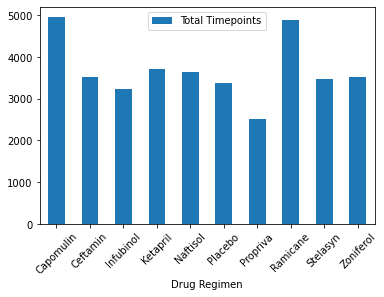

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
agg["Total Timepoints"] = mouse_df.groupby("Drug Regimen")["Timepoint"].sum()
agg.reset_index(inplace=True)
agg_bar = agg.plot.bar(x="Drug Regimen", y="Total Timepoints", rot=45)



<BarContainer object of 10 artists>

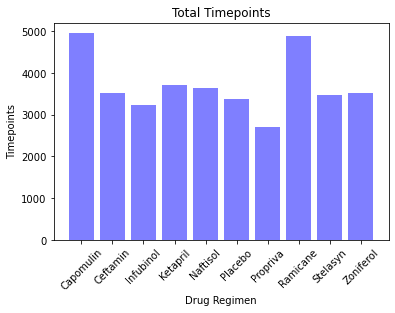

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis = agg["Total Timepoints"] = mouse_df.groupby("Drug Regimen")["Timepoint"].sum()
x_axis = mouse_df["Drug Regimen"].unique()
x_axis = np.sort(x_axis)

plt.title("Total Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints")
plt.xticks(rotation=45)
plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")

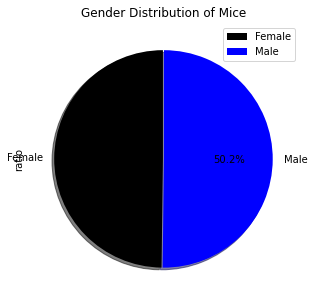

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gen = mouse_df[["Mouse ID", "Sex"]].copy()
mice_gen = mice_gen.drop_duplicates(subset=["Mouse ID"], keep='first')
mice_gen = pd.DataFrame(mice_gen)

total_mice = len(mice_gen)
total_females = mice_gen.loc[mice_gen["Sex"] == "Female"]["Mouse ID"].count()
total_males = mice_gen.loc[mice_gen["Sex"] == "Male"]["Mouse ID"].count()

ratio_mice = pd.DataFrame({"ratio": [total_females, total_males]})

indexes = ["Female", "Male"]
totals = [total_females, total_males]
colors = ["black", "blue"]
explode = (0.01,0)

plot = ratio_mice.plot.pie(title = "Gender Distribution of Mice", labels=indexes, explode=explode, startangle=90, shadow=True, colors=colors, autopct='%1.1f%%', y='ratio', figsize=(5,5) )


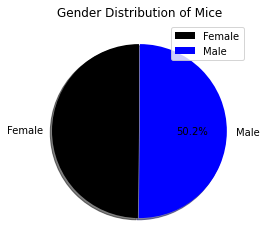

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.title("Gender Distribution of Mice")
patches, texts, a, = plt.pie(totals, labels=indexes, explode=explode, colors=colors, startangle=90, shadow=True, autopct='%1.1f%%')
plt.legend(patches, indexes, loc="best")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor = mouse_df.drop_duplicates(subset=["Mouse ID"], keep='last').copy()
final_tumor = final_tumor.loc[final_tumor["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
final_tumor = final_tumor[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
final_tumor.head()

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
9,k403,Ramicane,45,22.050126
19,s185,Capomulin,45,23.343598
29,x401,Capomulin,45,28.484033
39,m601,Capomulin,45,28.430964
49,g791,Ramicane,45,29.128472


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ("Capomulin", "Ramicane", "Infubinol", "Ceftamin")

# Create empty list to fill with tumor vol data (for plotting)
treatments_plot = ()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = final_tumor["Tumor Volume (mm3)"].quantile([0.25, 0.5, 0.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor size is {lowerq}")
print(f"The upper quartile of tumor size is: {upperq}")
print(f"The interquartile range of tumor size is: {iqr}")
print(f"The the median of tumor size is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr) # bottom whisker
upper_bound = upperq + (1.5*iqr) # upper whisker

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.") 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
treatments_plot = final_tumor.groupby("Drug Regimen")
tumor_volume = treatments_plot.apply(lambda x:x["Tumor Volume (mm3)"].unique())
tumor_volume = pd.DataFrame(tumor_volume)
tumor_volume.columns = ["Timepoints"]
print(tumor_volume)    

    

The lower quartile of tumor size is 37.1877438025
The upper quartile of tumor size is: 59.930261755
The interquartile range of tumor size is: 22.742517952499995
The the median of tumor size is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 94.04403868374999 could be outliers.
                                                     Timepoints
Drug Regimen                                                   
Capomulin     [23.34359787, 28.48403281, 28.43096411, 30.485...
Ceftamin      [62.99935619, 45.0, 56.05774909, 55.74282869, ...
Infubinol     [67.97341878, 65.52574285, 57.03186187, 66.083...
Ramicane      [22.05012627, 29.12847181, 30.27623175, 30.564...


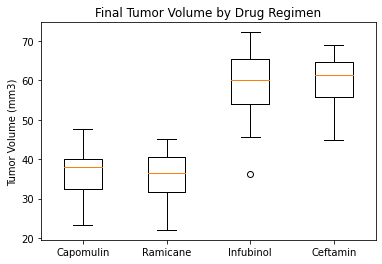

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,ax1 = plt.subplots()
ax1.set_title(f"Final Tumor Volume by Drug Regimen")
ax1.set_ylabel(f"Tumor Volume (mm3)")

plot_data = ()
plot_data = pd.DataFrame(plot_data)

for drug in treatments: 
    final = tumor_volume.loc[{drug}]
    plot_data = plot_data.append(final, ignore_index=True)
    
ax1.boxplot(plot_data["Timepoints"], labels=treatments)
plt.show()

## Line and Scatter Plots

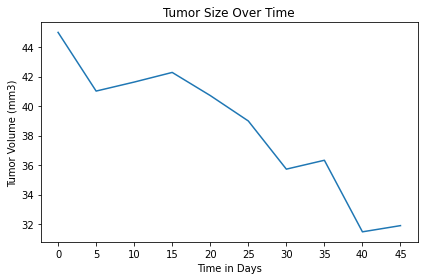

In [28]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_mice = mouse_df.loc[mouse_df["Drug Regimen"] == "Capomulin"]["Mouse ID"].unique()
cap_mice = pd.DataFrame(cap_mice)
cap_mice.columns = ["Mouse ID"]
cap_mouse = cap_mice.sample(axis=0)
cap_mouse = cap_mouse["Mouse ID"].tolist()
cap_mouse_df = mouse_df.loc[mouse_df["Mouse ID"] == (cap_mouse[0])]

y_axis = cap_mouse_df["Tumor Volume (mm3)"]
x_axis = cap_mouse_df["Timepoint"]
plt.title("Tumor Size Over Time")
plt.xlabel("Time in Days")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, y_axis)
plt.xticks(x_axis)
plt.tight_layout()
plt.show()

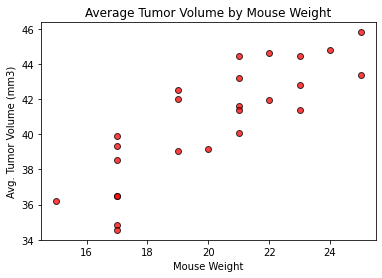

In [31]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
mouse_wt = mouse_df.loc[(mouse_df["Drug Regimen"] == "Capomulin")].groupby("Mouse ID")["Weight (g)"].min()
mouse_size = mouse_df.loc[(mouse_df["Drug Regimen"] == "Capomulin")].groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

plt.title("Average Tumor Volume by Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.scatter(mouse_wt, mouse_size, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

## Correlation and Regression

The correlation coefficient between subject weight and average tumor volume is 0.84
r-squared is: 0.7088568047708717


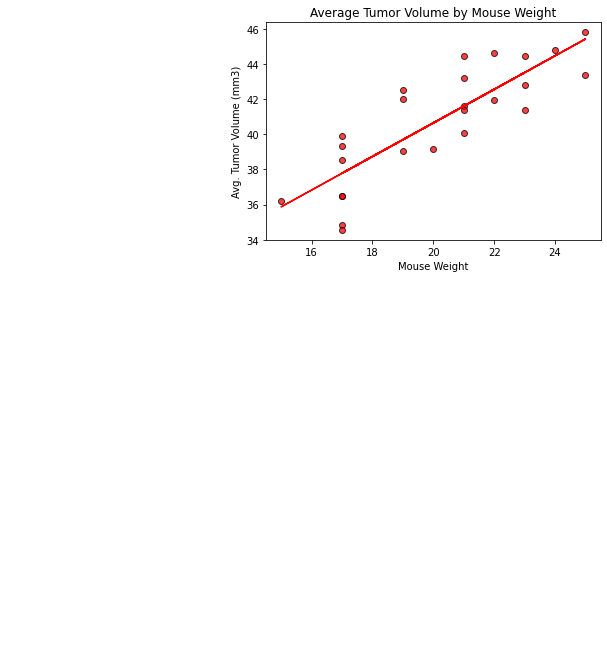

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
print(f"The correlation coefficient between subject weight and average tumor volume is {round(st.pearsonr(mouse_wt,mouse_size)[0],2)}")

from scipy.stats import linregress
(slope, intercept, rvalue, pvalue, stderr) = linregress(mouse_wt, mouse_size)
regress_values = mouse_wt * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.title("Average Tumor Volume by Mouse Weight")
plt.xlabel("Mouse Weight")
plt.ylabel("Avg. Tumor Volume (mm3)")
plt.scatter(mouse_wt, mouse_size, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

plt.plot(mouse_wt, regress_values, "r-")
plt.annotate(line_eq, (6,10), fontsize=15, color="red")

print(f"r-squared is: {rvalue**2}")
